In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('Final.xlsx')

In [3]:
df.head()

,Unnamed: 0,Team,Score,Opp_team,Team_score,Opp_team_score,Day,Date,Stadium,Place,...,opp_team_possession,opp_BALL GIVEN AWAY,opp_BALL RECOVERED,opp_FOULS COMMITTED,opp_FOULS WON,opp_GOALKEEPER INTERVENTIONS,opp_OFFSIDE,opp_RED CARDS,opp_YELLOW CARDS,opp_penalties
0,0,Girona,0-0,Valladolid,0,0,Friday,17/08/2018,Municipal de Montilivi,Girona,...,32.1%,143,60,20,17,2,1,0,1,0
1,1,Betis,0-3,Levante,0,3,Friday,17/08/2018,Benito Villamarín,Sevilla,...,22.9%,126,63,10,10,8,4,0,2,0
2,2,Celta,1-1,Espanyol,1,1,Saturday,18/08/2018,Balaídos,Pontevedra,...,51.6%,138,56,14,13,2,1,0,2,0
3,3,Villarreal,1-2,R. Sociedad,1,2,Saturday,18/08/2018,Estadio de la Cerámica,Castellón,...,47.6%,132,58,10,16,6,4,0,3,0
4,4,Barcelona,3-0,Alavés,3,0,Saturday,18/08/2018,Camp Nou,Barcelona,...,21.2%,105,57,13,5,6,0,0,2,0


In [4]:
df.columns

Index(['Unnamed: 0', 'Team', 'Score', 'Opp_team', 'Team_score',
       'Opp_team_score', 'Day', 'Date', 'Stadium', 'Place', 'Team_coach',
       'opp_team_coach', 'Team_formation', 'opp_team_formation',
       'BALL GIVEN AWAY', 'BALL RECOVERED', 'FOULS COMMITTED', 'FOULS WON',
       'GOALKEEPER INTERVENTIONS', 'OFFSIDE', 'RED CARDS', 'YELLOW CARDS',
       'penalties', 'Season', 'Team_possession', 'opp_team_possession',
       'opp_BALL GIVEN AWAY', 'opp_BALL RECOVERED', 'opp_FOULS COMMITTED',
       'opp_FOULS WON', 'opp_GOALKEEPER INTERVENTIONS', 'opp_OFFSIDE',
       'opp_RED CARDS', 'opp_YELLOW CARDS', 'opp_penalties'],
      dtype='object')

In [5]:
df.drop(columns='Unnamed: 0',inplace=True)

In [6]:
df.head()

,Team,Score,Opp_team,Team_score,Opp_team_score,Day,Date,Stadium,Place,Team_coach,...,opp_team_possession,opp_BALL GIVEN AWAY,opp_BALL RECOVERED,opp_FOULS COMMITTED,opp_FOULS WON,opp_GOALKEEPER INTERVENTIONS,opp_OFFSIDE,opp_RED CARDS,opp_YELLOW CARDS,opp_penalties
0,Girona,0-0,Valladolid,0,0,Friday,17/08/2018,Municipal de Montilivi,Girona,Eusebio Sacristán,...,32.1%,143,60,20,17,2,1,0,1,0
1,Betis,0-3,Levante,0,3,Friday,17/08/2018,Benito Villamarín,Sevilla,Quique Setién,...,22.9%,126,63,10,10,8,4,0,2,0
2,Celta,1-1,Espanyol,1,1,Saturday,18/08/2018,Balaídos,Pontevedra,Antonio Mohamed,...,51.6%,138,56,14,13,2,1,0,2,0
3,Villarreal,1-2,R. Sociedad,1,2,Saturday,18/08/2018,Estadio de la Cerámica,Castellón,Javier Calleja,...,47.6%,132,58,10,16,6,4,0,3,0
4,Barcelona,3-0,Alavés,3,0,Saturday,18/08/2018,Camp Nou,Barcelona,Ernesto Valverde,...,21.2%,105,57,13,5,6,0,0,2,0


# Plotting Total goals of the teams

In [7]:
from collections import Counter

In [8]:
total_goals=Counter()

In [9]:
for num,i in enumerate(df['Team']):
    total_goals[i]+=df['Team_score'][num]
for num,i in enumerate(df['Opp_team']):
    total_goals[i]+=df['Opp_team_score'][num]

In [10]:
goals=pd.Series(total_goals)

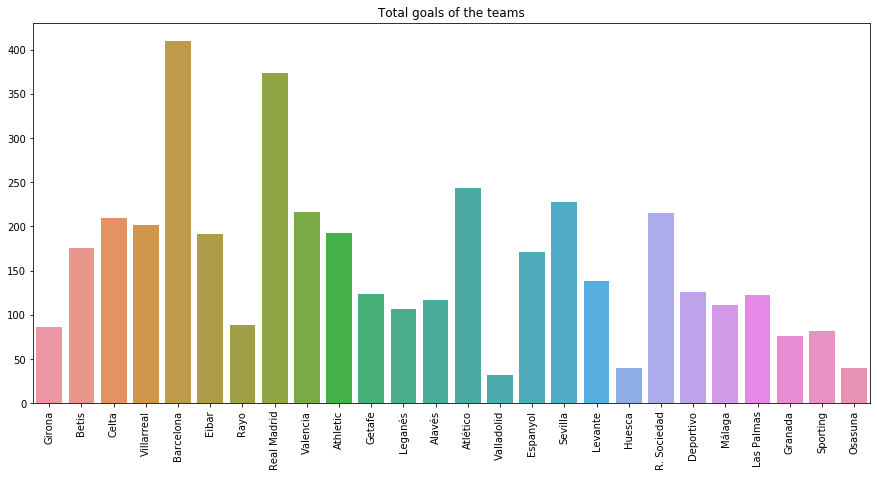

In [11]:
plt.figure(figsize=(15,7))
sns.barplot(x=goals.index,y=goals.values)
plt.xticks(rotation='90')
plt.title('Total goals of the teams')
plt.show()

# Plotting total goals in each season

In [12]:
def season_goals(season):
    season_df=df[df['Season']==season]
    season_goals1=Counter()
    for num,i in enumerate(season_df['Team']):
        season_goals1[i]+=list(season_df['Team_score'])[num]
    for num,i in enumerate(season_df['Opp_team']):
        season_goals1[i]+=list(season_df['Opp_team_score'])[num]
    s_goals=pd.Series(season_goals1)
    plt.figure(figsize=(15,7))
    sns.barplot(x=s_goals.index,y=s_goals.values)
    plt.xticks(rotation='90')
    plt.title('Total goals of the teams in {} season'.format(season))
    plt.show()

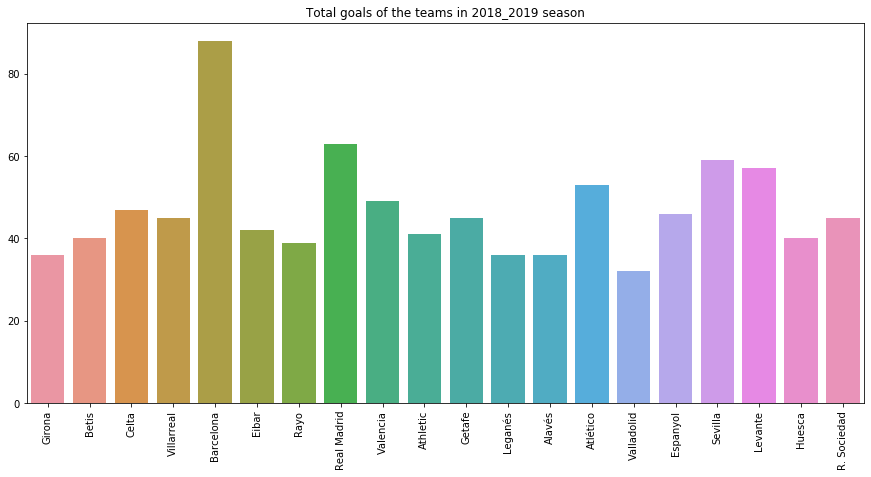

In [13]:
season_goals('2018_2019')

# Plotting matches results by teams in a season

In [14]:
def teams_in_season(season):
    matches_won1=Counter()
    matches_lost1=Counter()
    matches_draw1=Counter()
    s_df=df[df['Season']==season]
    for num,i in enumerate(s_df['Team']):
        if s_df['Team_score'][num]>s_df['Opp_team_score'][num]:
            matches_won1[i]+=1
        elif s_df['Team_score'][num]==s_df['Opp_team_score'][num]:
            matches_draw1[i]+=1
        elif s_df['Team_score'][num]<s_df['Opp_team_score'][num]:
            matches_lost1[i]+=1
    for num,i in enumerate(s_df['Opp_team']):
        if s_df['Opp_team_score'][num]<s_df['Team_score'][num]:
            matches_lost1[i]+=1
        elif s_df['Opp_team_score'][num]>s_df['Team_score'][num]:
            matches_won1[i]+=1
        elif s_df['Opp_team_score'][num]==s_df['Team_score'][num]:
            matches_draw1[i]+=1
    wm1=pd.Series(matches_won1)
    lm1=pd.Series(matches_lost1)
    dm1=pd.Series(matches_draw1)  
    plt.figure(figsize=(18,7))
    plt.subplot(1,3,1)
    sns.barplot(x=wm1.index,y=wm1.values)
    plt.xticks(rotation='90')
    plt.title('Total matches won by the teams in season {}'.format(season))
    plt.subplot(1,3,2)
    sns.barplot(x=lm1.index,y=lm1.values)
    plt.xticks(rotation='90')
    plt.title('Total matches lost by the teams in season {}'.format(season))
    plt.subplot(1,3,3)
    sns.barplot(x=dm1.index,y=dm1.values)
    plt.xticks(rotation='90')
    plt.title('Total matches drawn by the teams in season {}'.format(season))
    plt.show()

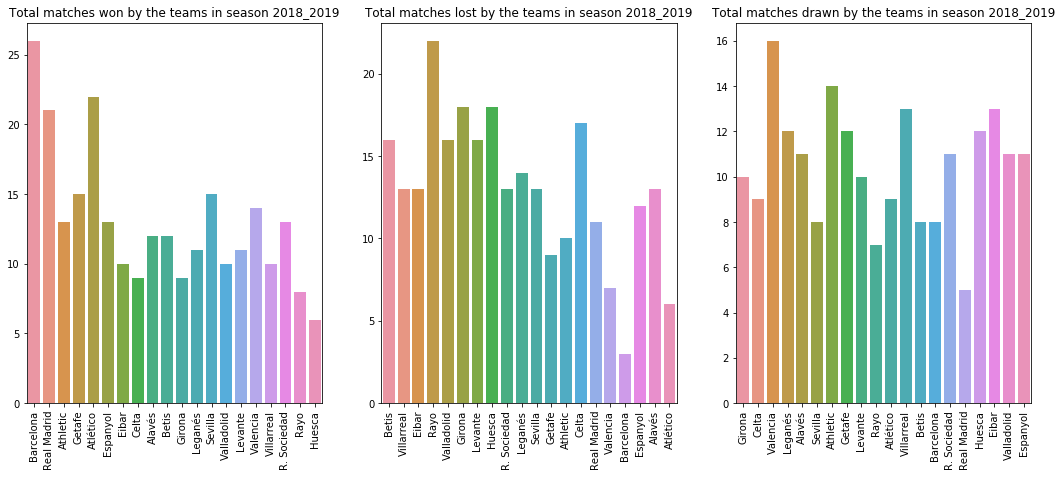

In [15]:
teams_in_season('2018_2019')

# Plotting team prefomance in a season

In [16]:
def team_in_season(season,team):
    t_df=df[(df['Team']==team)  & (df['Season']==season)].sort_values('Opp_team')
    o_df=df[(df['Opp_team']==team) & (df['Season']==season)].sort_values('Team')
    
    hres=[]
    ares=[]
    for num,i in enumerate(t_df['Team_score'].astype('int32')):
        a=t_df['Opp_team_score'].values[num].astype('int32')
        if i>a:
            hres.append('Won')
        elif i<a:
            hres.append('Lost')
        else:
            hres.append('Draw')
    for num,i in enumerate(o_df['Opp_team_score'].astype('int32')):
        a=o_df['Team_score'].values[num].astype('int32')
        if i>a:
            ares.append('Won')
        elif i<a:
            ares.append('Lost')
        else:
            ares.append('Draw')
    ######### plotting matches results ########        
    plt.figure(figsize=(17,7))
    plt.plot(t_df['Opp_team'],hres,marker='o')
    plt.plot(o_df['Team'],ares,marker='*')
    plt.legend(['Home','Away'])
    plt.xticks(rotation='90')
    plt.grid()
    plt.show()
    ########### plotting possession ###########
    plt.figure(figsize=(17,7))
    plt.subplot(1,2,1)
    plt.plot(t_df['Opp_team'].values,t_df['Team_possession'].str.replace('%','').astype('float64'),marker='o')
    plt.plot(t_df['Opp_team'].values,t_df['opp_team_possession'].str.replace('%','').astype('float64'),marker='o')
    plt.xticks(rotation='90')
    plt.ylabel('Possession')
    plt.title('Possesion of {} with different teams in 2018_2019 in home games'.format(team))
    #plt.legend([team,'Opp_teams'])
    plt.subplot(1,2,2)
    plt.plot(o_df['Team'].values,o_df['opp_team_possession'].str.replace('%','').astype('float64'),marker='o')
    plt.plot(o_df['Team'].values,o_df['Team_possession'].str.replace('%','').astype('float64'),marker='o')
    plt.xticks(rotation='90')
    plt.ylabel('Possession')
    plt.title('Possesion of {} with different teams in 2018_2019 in away games'.format(team))
    plt.legend([team,'Opp_teams vs {}'.format(team)],loc=(-0.2,1.05))
    plt.show()
    ############## formations ################
    plt.figure(figsize=(17,7))
    plt.subplot(1,2,1)
    sns.countplot(t_df['Team_formation'])
    plt.xlabel('Formations')
    plt.title('{} team_formation in home games'.format(team))
    plt.subplot(1,2,2)
    sns.countplot(o_df['opp_team_formation'])
    plt.xlabel('Formations')
    plt.title('{} team_formation in away games'.format(team))
    plt.show()

    plt.figure(figsize=(17,7))
    plt.subplot(1,2,1)
    plt.scatter(t_df['Opp_team'],t_df['Team_formation'])
    plt.scatter(t_df['Opp_team'],t_df['opp_team_formation'])
    plt.xticks(rotation='90')
    plt.ylabel('Formations')
    plt.title('Formations of the teams in 2018_2019 in {} home games'.format(team))
    plt.subplot(1,2,2)
    plt.scatter(o_df['Team'],o_df['opp_team_formation'])
    plt.scatter(o_df['Team'],o_df['Team_formation'])
    plt.xticks(rotation='90')
    plt.ylabel('Formations')
    plt.title('Formations of the teams in 2018_2019 in {} away games'.format(team))
    plt.legend([team,'Opp_teams vs {}'.format(team)],loc=(-0.2,1.05))
    plt.show()
    ############## fouls ####################
    plt.figure(figsize=(17,7))
    plt.subplot(1,2,1)
    plt.plot(t_df['Opp_team'].values,t_df['FOULS COMMITTED'],marker='o')
    plt.plot(t_df['Opp_team'].values,t_df['opp_FOULS COMMITTED'],marker='o')
    plt.xticks(rotation='90')
    plt.ylabel('Fouls committed')
    plt.title('Fouls Committed in 2018_2019 in home games')
    plt.subplot(1,2,2)
    plt.plot(o_df['Team'].values,o_df['opp_FOULS COMMITTED'],marker='o')
    plt.plot(o_df['Team'].values,o_df['FOULS COMMITTED'],marker='o')
    plt.xticks(rotation='90')
    plt.ylabel('Fouls committed')
    plt.title('Fouls Committed in 2018_2019 in away games')
    plt.legend([team,'Opp_teams vs {}'.format(team)],loc=(-0.2,1.05))
    plt.show() 
    ############ cards ##########
    plt.figure(figsize=(17,7))
    plt.subplot(1,2,1)
    sns.barplot(t_df['Opp_team'],t_df['opp_YELLOW CARDS'])
    plt.plot(t_df['Opp_team'],t_df['YELLOW CARDS'],marker='o')
    plt.xlabel('Teams')
    plt.ylabel('YELLOE CARDS')
    plt.title('Home')
    plt.xticks(rotation='90')
    plt.subplot(1,2,2)
    sns.barplot(o_df['Team'],o_df['YELLOW CARDS'])
    plt.plot(o_df['Team'],o_df['opp_YELLOW CARDS'],marker='o')
    plt.legend([team],loc=[-0.2,1.05])
    plt.xticks(rotation='90')
    plt.title('Away')
    plt.xlabel('Teams')
    plt.show()


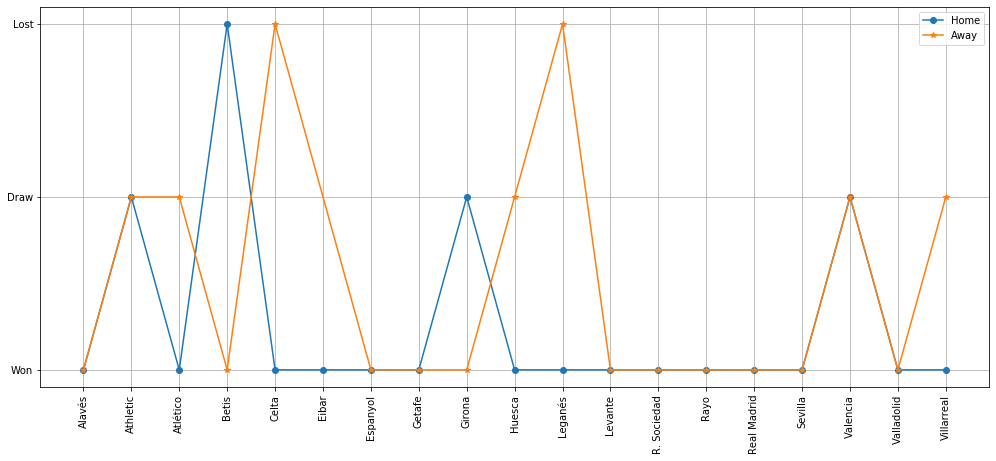

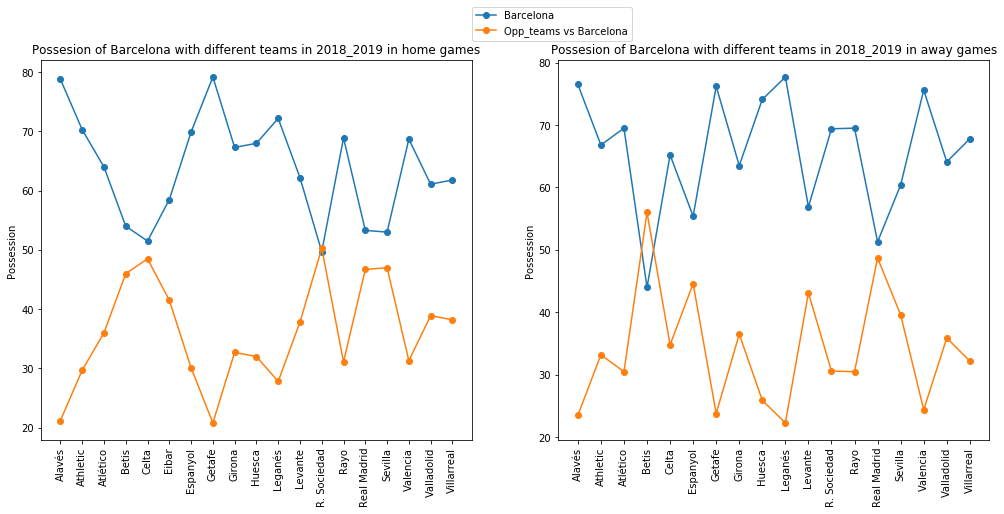

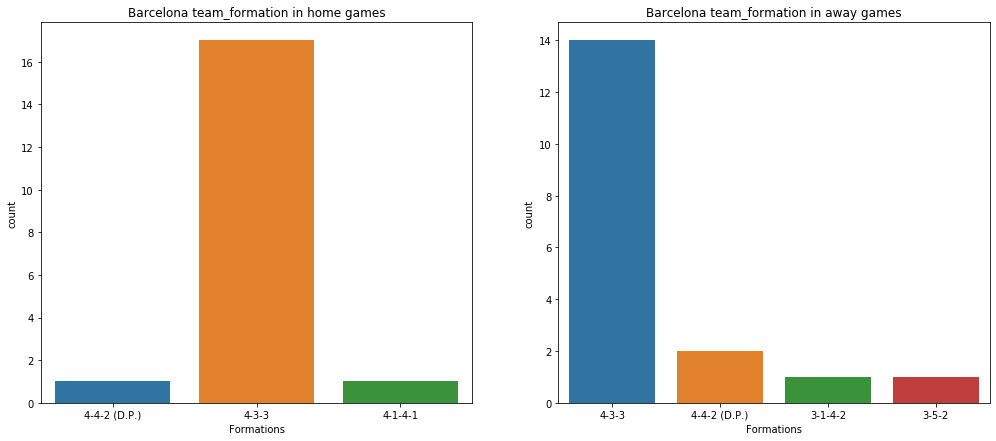

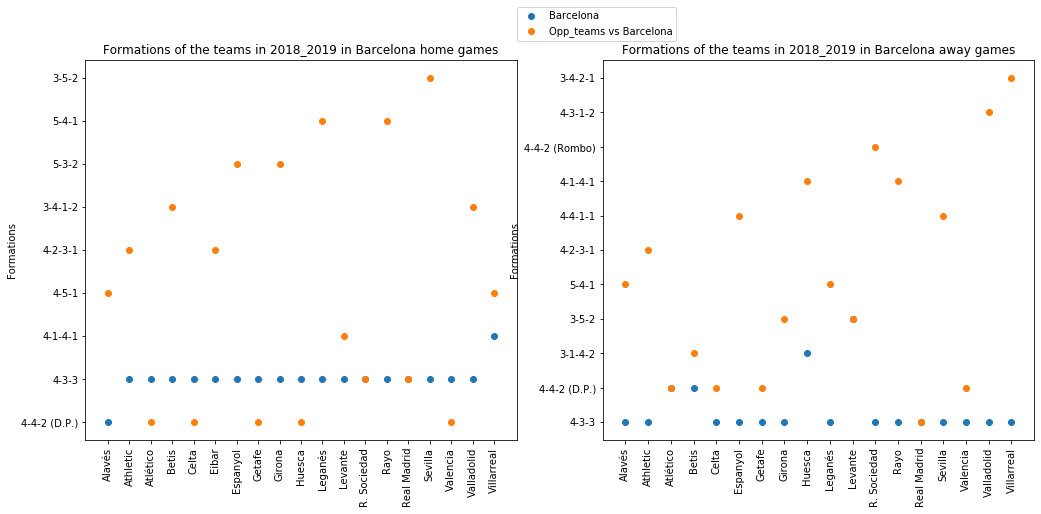

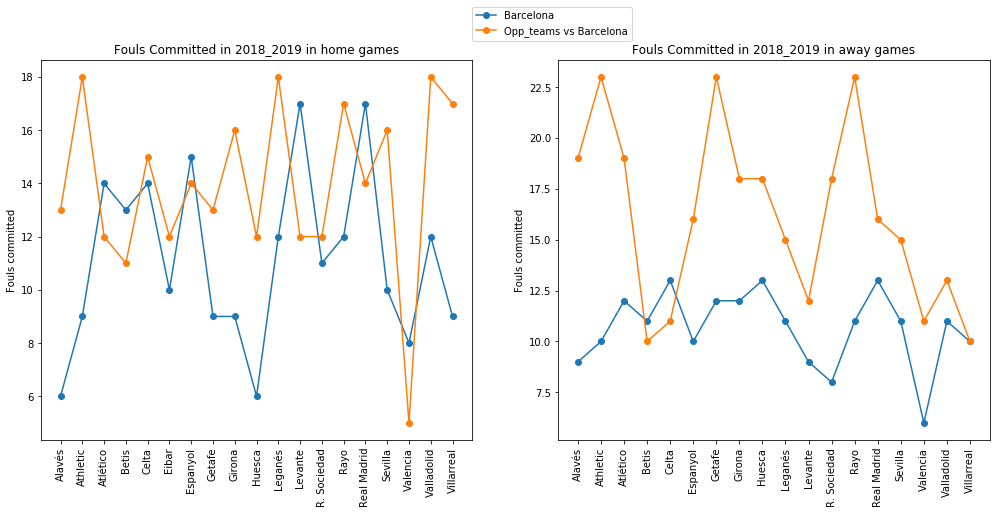

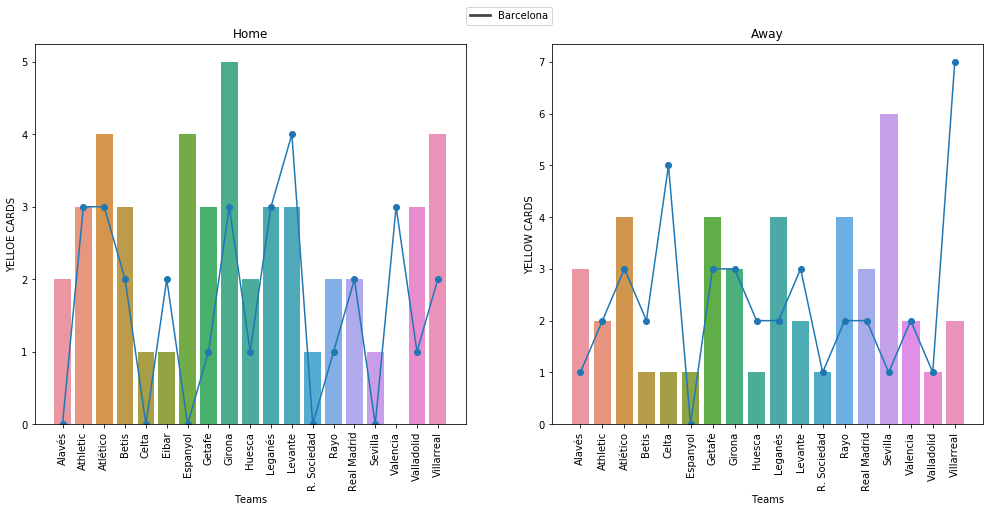

In [17]:
team_in_season('2018_2019','Barcelona')